In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [22]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

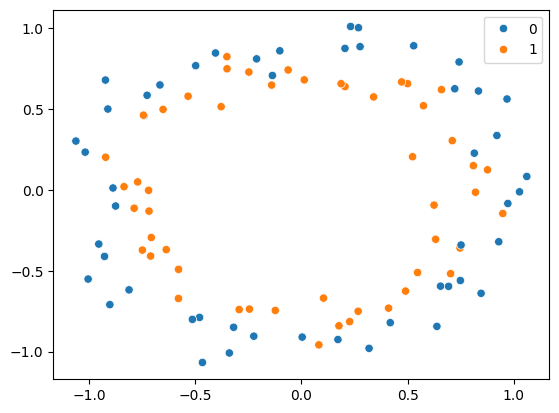

In [23]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [25]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
#  history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2500,verbose=0)

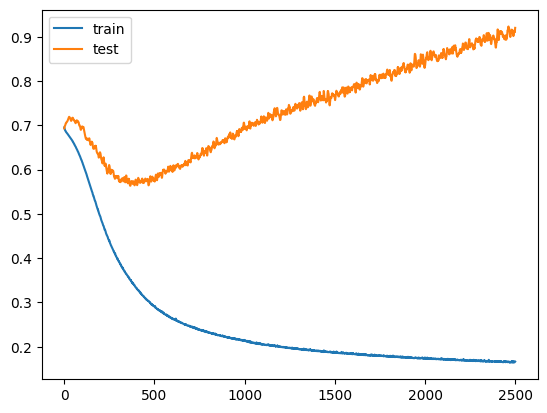

In [28]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 690us/step


<Axes: >

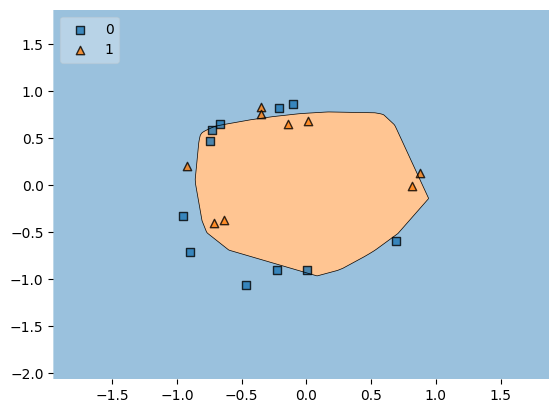

In [30]:
plot_decision_regions(X_test,y_test.ravel(),clf = model,legend =2)

In [47]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=400,
    verbose=1,
    mode="auto",
    baseline=400,
    restore_best_weights=False
)

In [53]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2500, callbacks=callback)

Epoch 1/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6008 - loss: 0.6635 - val_accuracy: 0.4500 - val_loss: 0.7136
Epoch 2/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6523 - loss: 0.6565 - val_accuracy: 0.5000 - val_loss: 0.7126
Epoch 3/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6328 - loss: 0.6611 - val_accuracy: 0.5000 - val_loss: 0.7141
Epoch 4/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5977 - loss: 0.6616 - val_accuracy: 0.5000 - val_loss: 0.7132
Epoch 5/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5961 - loss: 0.6654 - val_accuracy: 0.5500 - val_loss: 0.7129
Epoch 6/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6430 - loss: 0.6593 - val_accuracy: 0.5000 - val_loss: 0.7148
Epoch 7/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6586 - loss: 0.6509 - val_accuracy: 0.5000 - val_loss: 0.7179
Epoch 8/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5664 - loss: 0.6690 - val_accuracy: 0.5000 - v

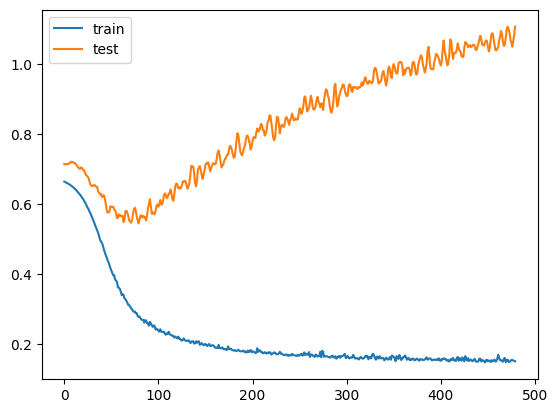

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 779us/step


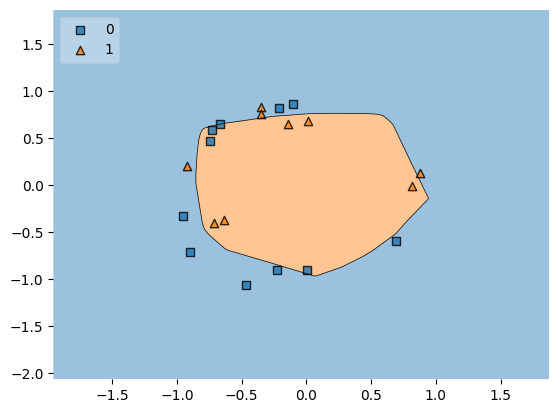

In [55]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()
